Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



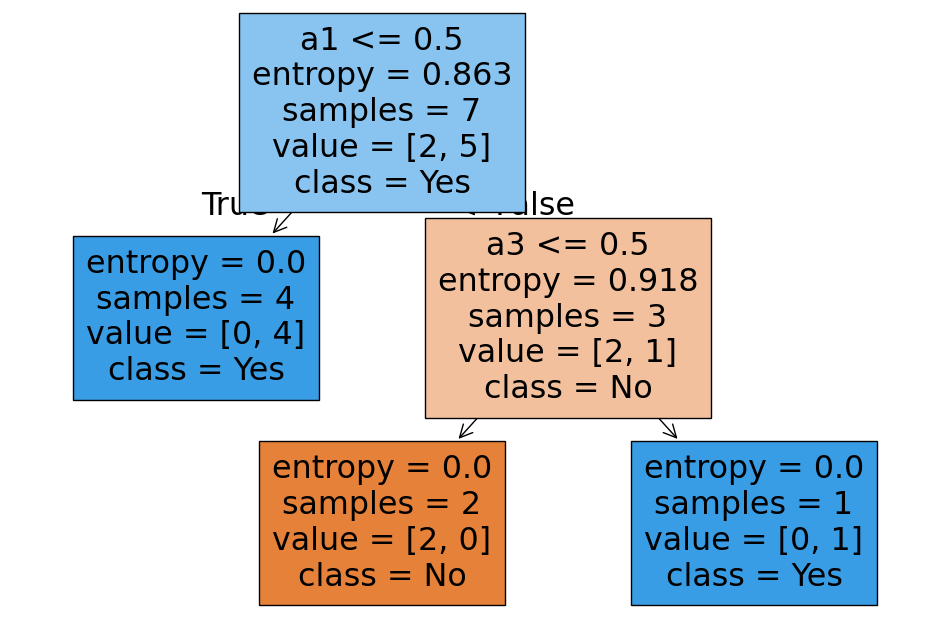

In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the dataset
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

data

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Optionally, visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import math

# Load IRIS dataset
iris = pd.read_csv('iris.csv')
X_iris = iris.iloc[:, :-1]
y_iris = iris.iloc[:, -1]
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train Decision Tree Classifier for IRIS
dt_iris = DecisionTreeClassifier()
dt_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = dt_iris.predict(X_test_iris)

# Display results for IRIS
print("IRIS Dataset:")
print("Accuracy Score:", accuracy_score(y_test_iris, y_pred_iris))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))

# Load Drug dataset
drug = pd.read_csv('drug.csv')

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
for column in drug.columns:
    if drug[column].dtype == 'object':  # Check if the column contains categorical data
        le = LabelEncoder()
        drug[column] = le.fit_transform(drug[column])  # Encode and replace original column
        label_encoders[column] = le  # Store encoder for later decoding if needed

# Prepare training and testing data
X_drug = drug.iloc[:, :-1]  # Features
y_drug = drug.iloc[:, -1]   # Target variable

X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

# Train Decision Tree Classifier for Drug dataset
dt_drug = DecisionTreeClassifier()
dt_drug.fit(X_train_drug, y_train_drug)
y_pred_drug = dt_drug.predict(X_test_drug)

# Display results for Drug dataset
print("\nDrug Dataset:")
print("Accuracy Score:", accuracy_score(y_test_drug, y_pred_drug))
print("Confusion Matrix:\n", confusion_matrix(y_test_drug, y_pred_drug))

# Load Petrol Consumption dataset
petrol = pd.read_csv('petrol_consumption.csv')
X_petrol = petrol.iloc[:, :-1]
y_petrol = petrol.iloc[:, -1]
X_train_petrol, X_test_petrol, y_train_petrol, y_test_petrol = train_test_split(X_petrol, y_petrol, test_size=0.2, random_state=42)

# Train Regression Tree for Petrol Consumption
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_petrol, y_train_petrol)
y_pred_petrol = dt_regressor.predict(X_test_petrol)

# Display regression metrics
print("\nPetrol Consumption Dataset:")
print("Mean Absolute Error:", mean_absolute_error(y_test_petrol, y_pred_petrol))
print("Mean Squared Error:", mean_squared_error(y_test_petrol, y_pred_petrol))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test_petrol, y_pred_petrol)))

IRIS Dataset:
Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Drug Dataset:
Accuracy Score: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

Petrol Consumption Dataset:
Mean Absolute Error: 89.9
Mean Squared Error: 16116.3
Root Mean Squared Error: 126.9499901536034
